In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored

In [514]:
def count_plot(x, hue, m, data,timon):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(121)
    ax = sns.countplot(x = x, hue=hue, data=data, palette="Set1")
    ax.set_title(f'Diagrama de barras {m}', size=12)
    ax.set_ylabel('Observaciones', size=12)
    ax.set_xlabel(x,size=12)
    ax = plt.subplot(122)
    ax = mosaic(timon, title= f'Diagrama de mosaico {m}', ax=ax)   

In [515]:
def hist_plot(X,y,v1,v2):
    plt.figure(figsize=(18,8))
    ax = plt.subplot(131)
    ax.set_title(f'Histograma {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], kde = False, bins=10, label= v1, color='orange')
    ax = sns.distplot(data[data[y] == v2][X], kde = False, bins=10, label= v2, color='b')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.set_ylabel('Observaciones', size=12)
    ax.legend()
    
    ax = plt.subplot(132)
    ax.set_title(f'Densidad {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], hist = False, bins=10, label = v1,color='orange')
    ax = sns.distplot(data[data[y] == v2][X], hist = False, bins=10, label = v2,color='blue')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.legend()
    
    ax = plt.subplot(133)
    kwargs = {'cumulative': True}
    ax.set_title(f'Frecuencia Acumulada {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], bins=10, label = v1, color='orange', hist_kws=kwargs)
    ax = sns.distplot(data[data[y] == v2][X], bins=10, label = v2, color='blue', hist_kws=kwargs)
    ax.set_ylabel('Observaciones', size=12)
    ax.legend()

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


In [516]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./Data_C_B.csv')
data.head()

Cargamos los datos


,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,...,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,second_sp,second_dp,third_sp,third_dp
0,2,TCP,243.01100,243.0110,243.01100,486.022,243.011,243.011,34,438,...,17.00,3578.0,6660.0,9742.0,mine,Bitcoin,55821,55821,123,443
1,2,TCP,554.68125,554.6815,554.68175,1109.363,554.682,554.681,36,66,...,18.00,1497.0,2294.0,3091.0,mine,Monero,14444,14444,123,443
2,119,TCP,0.66750,102.1360,112.38000,8193.891,202.635,0.000,711,1502,...,6.00,45.0,128.0,224.0,not_mine,Does_not_have,80,443,5353,80
3,2,TCP,551.63250,551.6330,551.63350,1103.266,551.634,551.632,61,318,...,31.25,5964.5,10974.0,15983.5,mine,Bitcash,49875,49875,123,443
4,4,TCP,169.33175,206.5110,243.68325,826.016,243.684,169.310,75,536,...,20.25,488.0,5692.5,12123.5,mine,Bitcoin,52327,52327,52334,52334


### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado.

In [517]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Análisis datos 

### Variables Categoricas

,TCP,UDP,ICMP,ICMP6
mine,2232,0,0,0
not_mine,1995,504,1,1


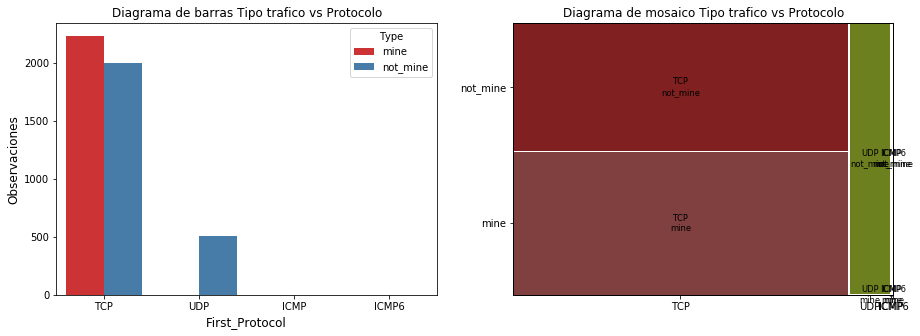

In [518]:
A = 'First_Protocol'
B = 'Type'
m = 'Tipo trafico vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,4), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[0], B, m, data, datas)
display(table_conti)

In [519]:
data_object

['First_Protocol', 'Type', 'Cryptocurrency']

,Bitcoin,Monero,Does_not_have,Bitcash,Etherium,Litecoin
mine,247,192,0,485,959,349
not_mine,0,0,2501,0,0,0


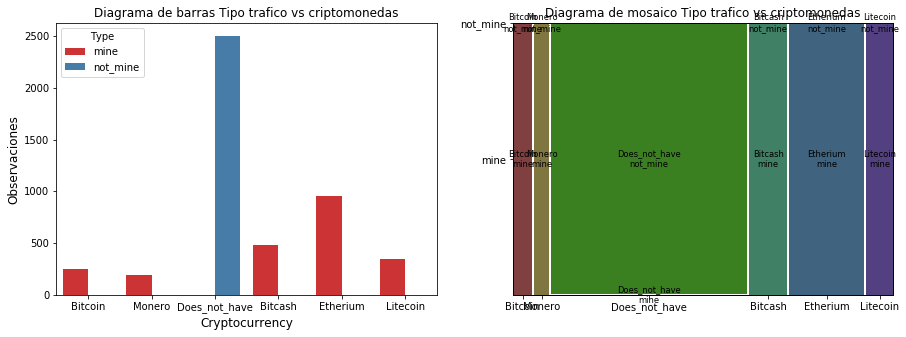

In [520]:
A = 'Cryptocurrency'
B = 'Type'
m = 'Tipo trafico vs criptomonedas'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,6), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

,Bitcoin,Monero,Does_not_have,Bitcash,Etherium,Litecoin
TCP,247,192,1995,485,959,349
UDP,0,0,504,0,0,0
ICMP,0,0,1,0,0,0
ICMP6,0,0,1,0,0,0


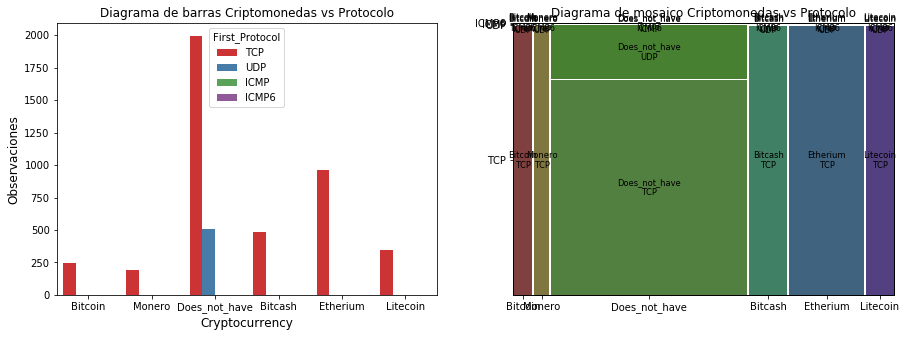

In [521]:
A = 'Cryptocurrency'
B = 'First_Protocol'
m = 'Criptomonedas vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(4,6), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

### Variables Continuas

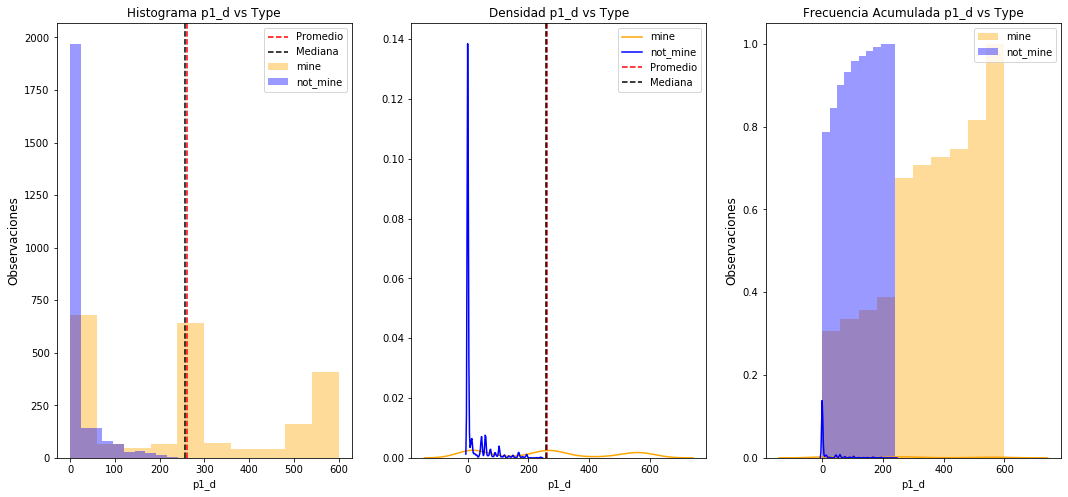

In [522]:
hist_plot(data_numeric_float[0],'Type','mine','not_mine')

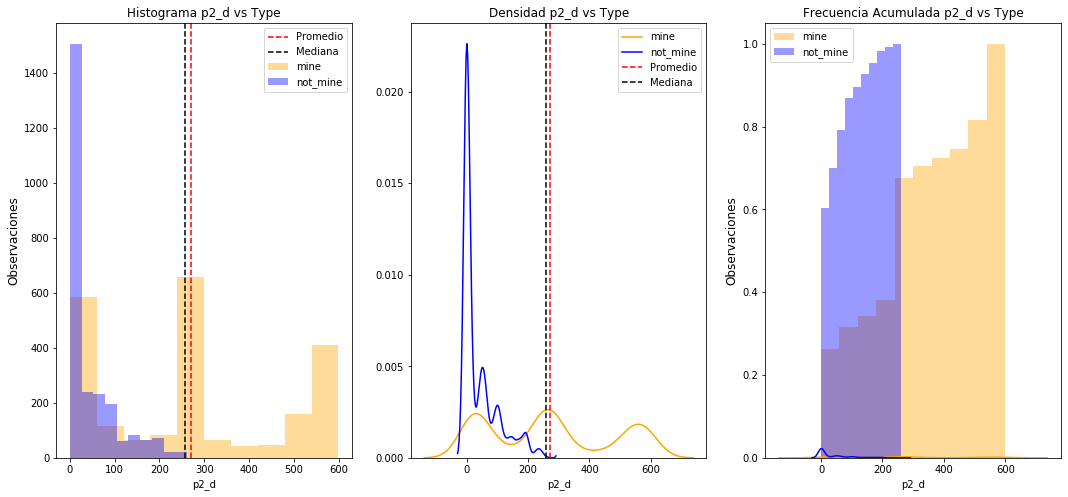

In [523]:
hist_plot(data_numeric_float[1],'Type','mine','not_mine')

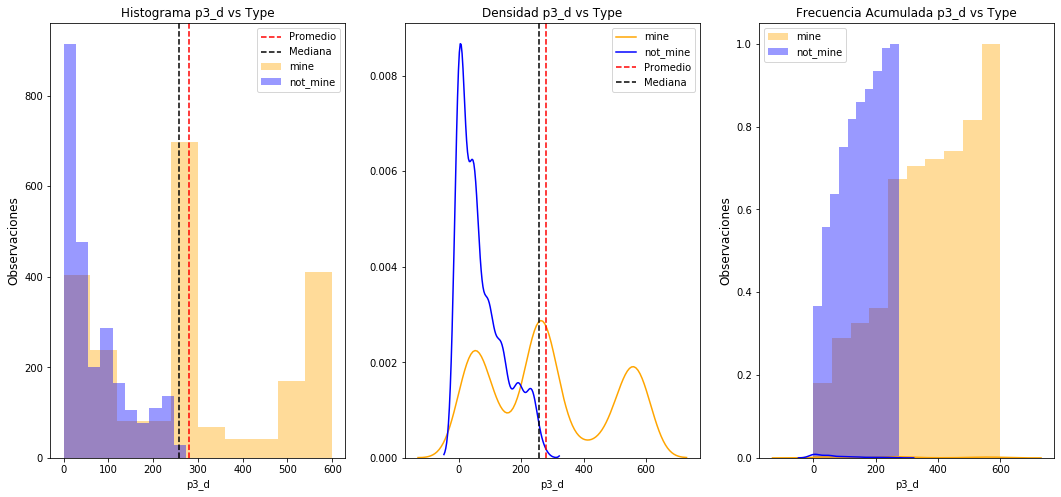

In [524]:
hist_plot(data_numeric_float[2],'Type','mine','not_mine')

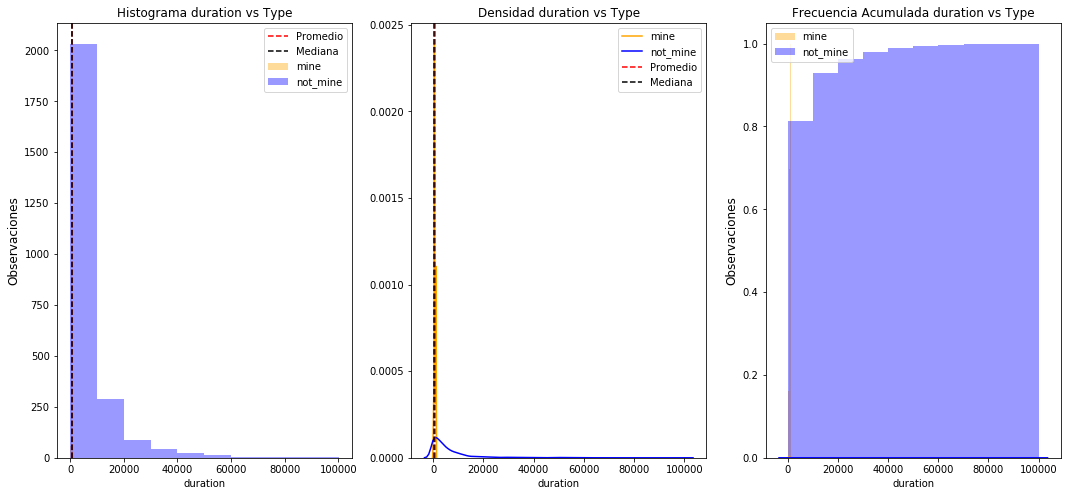

In [525]:
hist_plot(data_numeric_float[3],'Type','mine','not_mine')

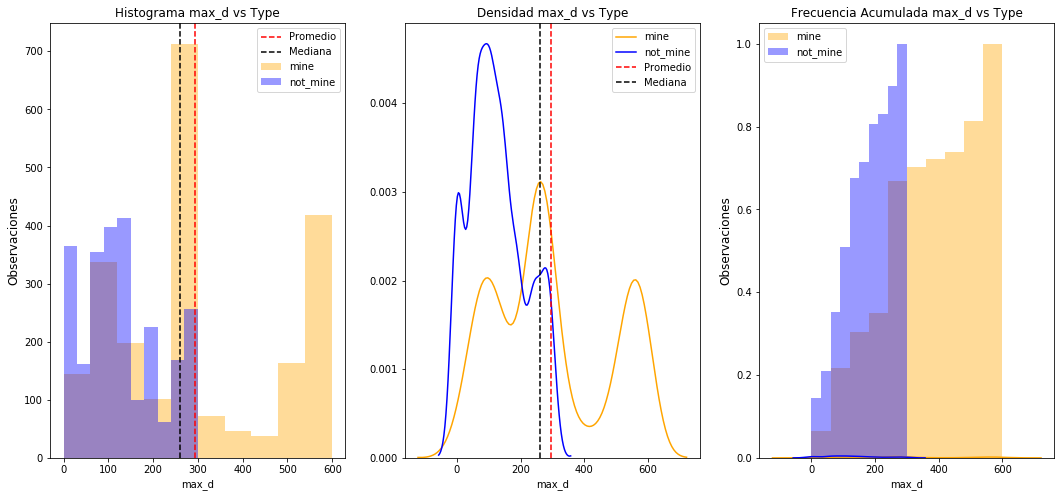

In [526]:
hist_plot(data_numeric_float[4],'Type','mine','not_mine')

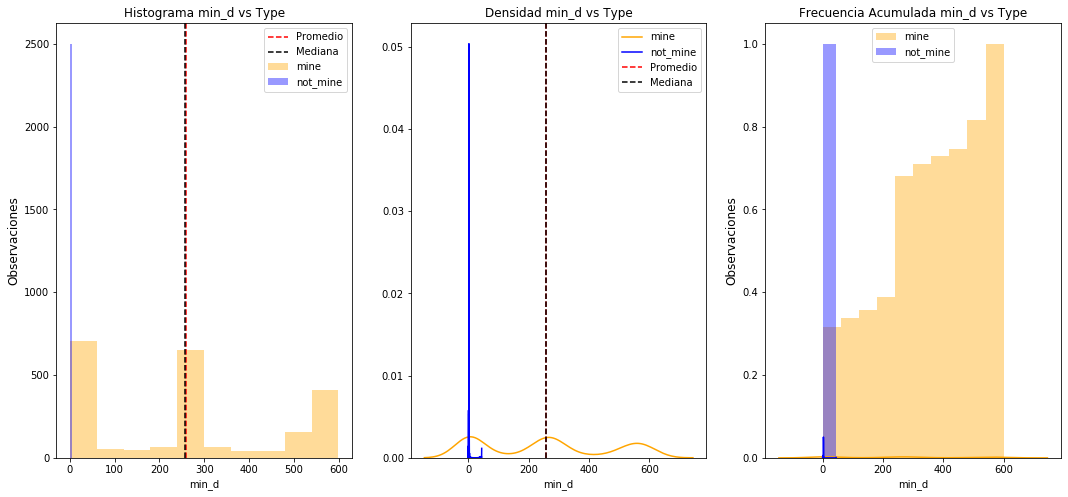

In [527]:
hist_plot(data_numeric_float[5],'Type','mine','not_mine')

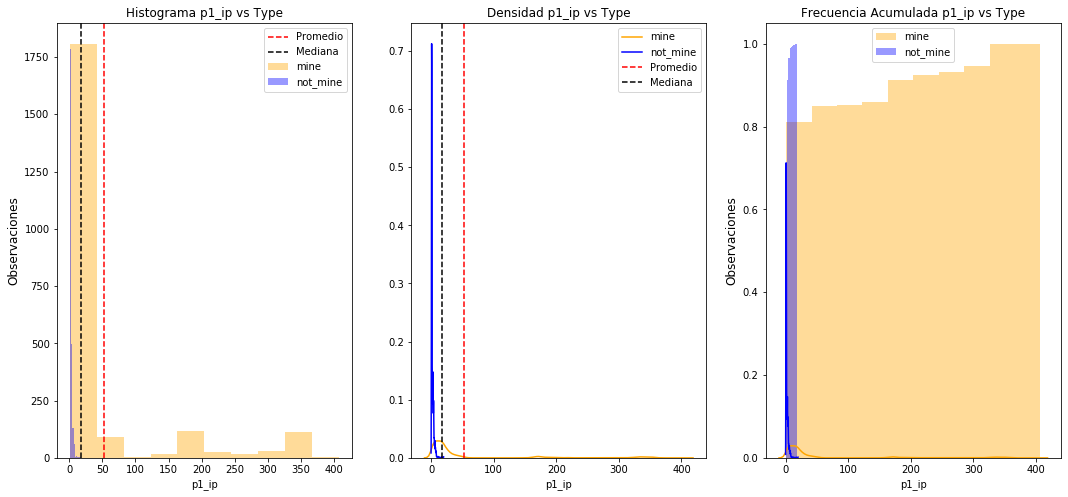

In [528]:
hist_plot(data_numeric_float[6],'Type','mine','not_mine')

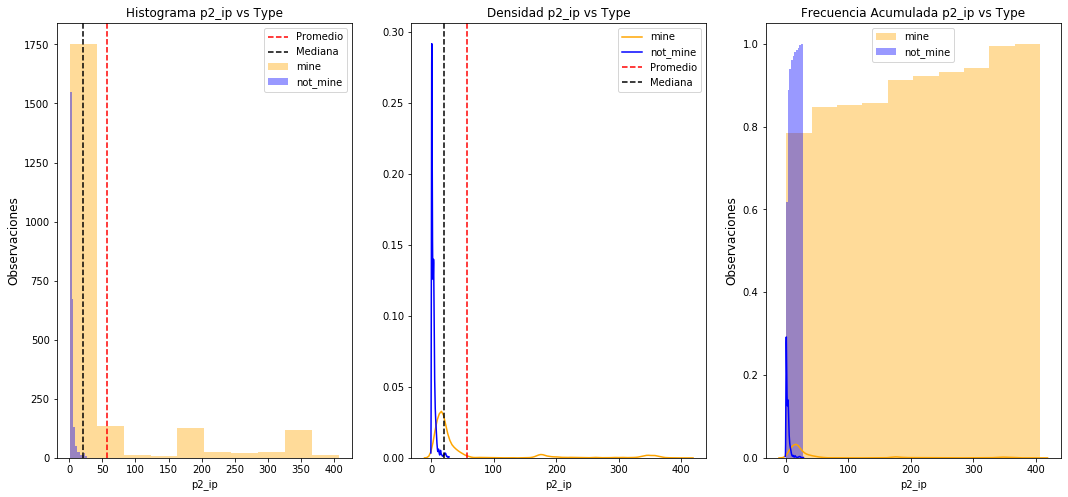

In [529]:
hist_plot(data_numeric_float[7],'Type','mine','not_mine')

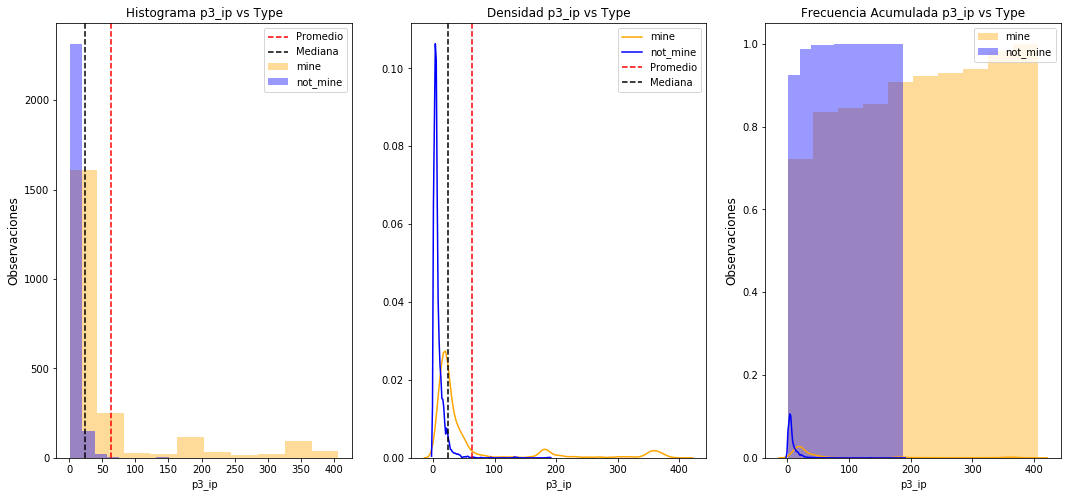

In [530]:
hist_plot(data_numeric_float[8],'Type','mine','not_mine')

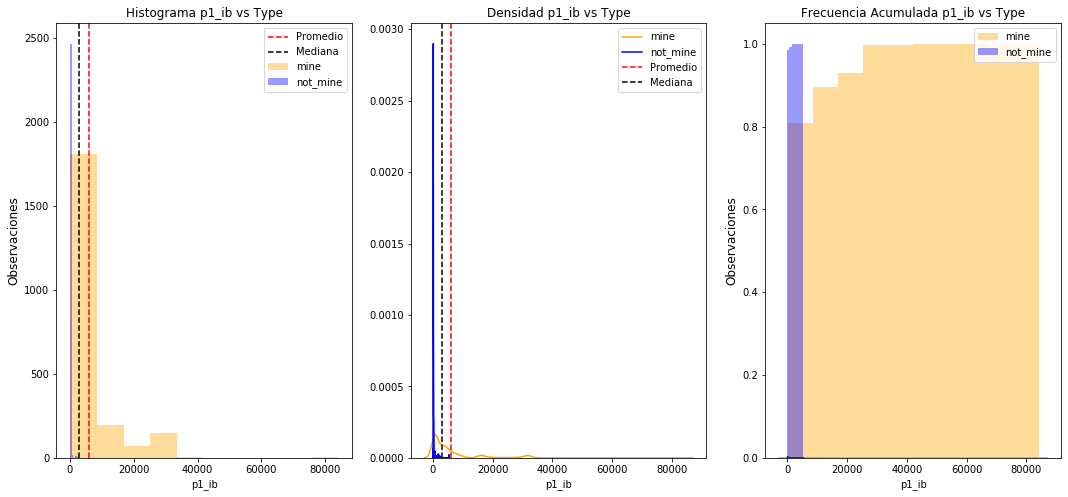

In [531]:
hist_plot(data_numeric_float[9],'Type','mine','not_mine')

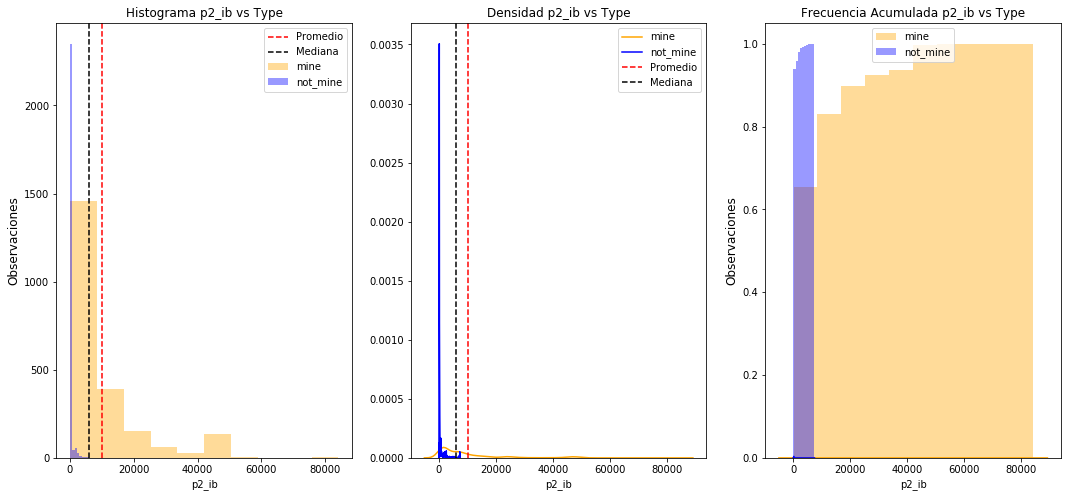

In [532]:
hist_plot(data_numeric_float[10],'Type','mine','not_mine')

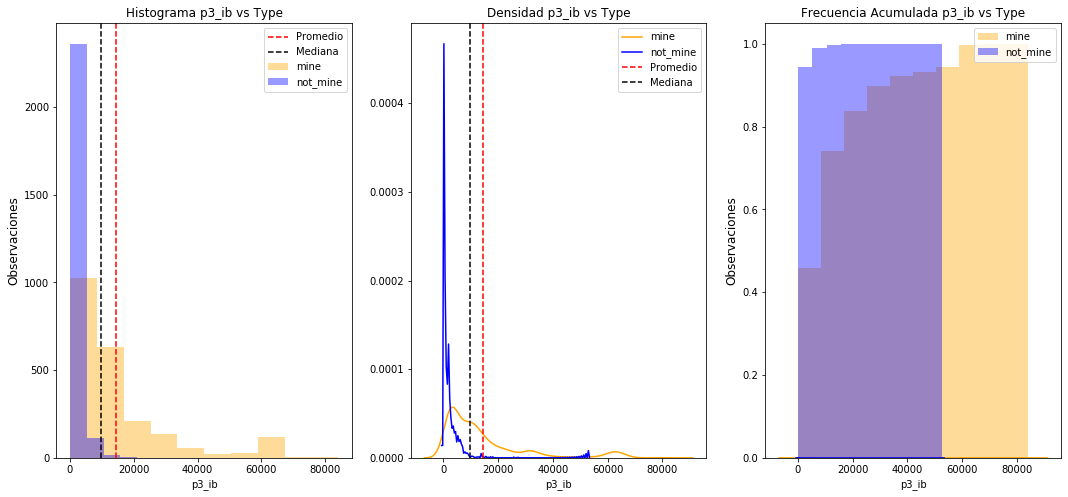

In [533]:
hist_plot(data_numeric_float[11],'Type','mine','not_mine')

### Variables Discretas

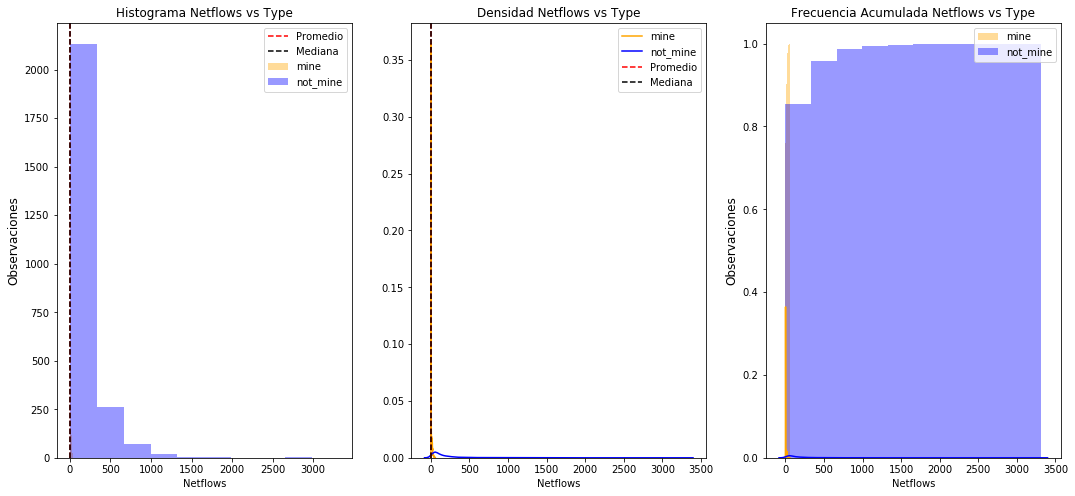

In [534]:
hist_plot(data_numeric_int[0],'Type','mine','not_mine')

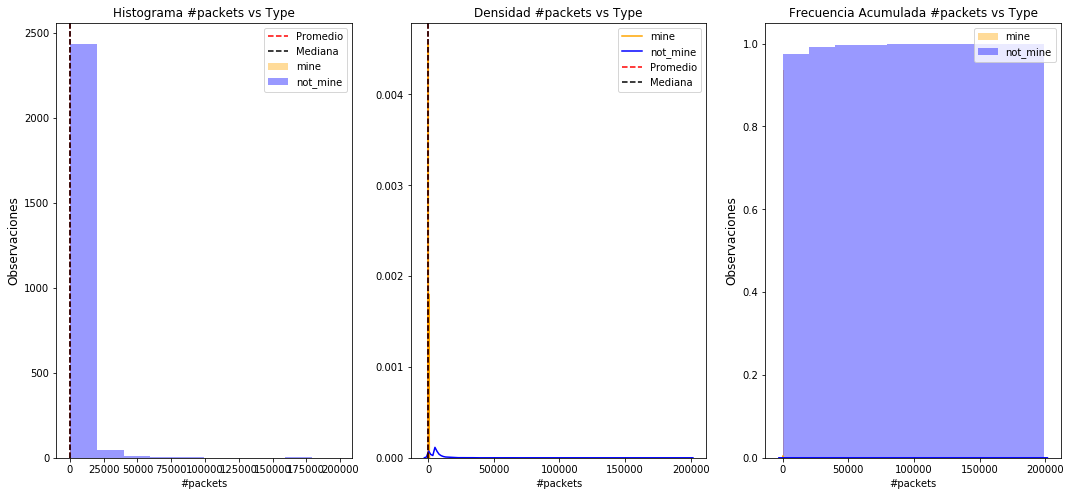

In [535]:
hist_plot(data_numeric_int[1],'Type','mine','not_mine')

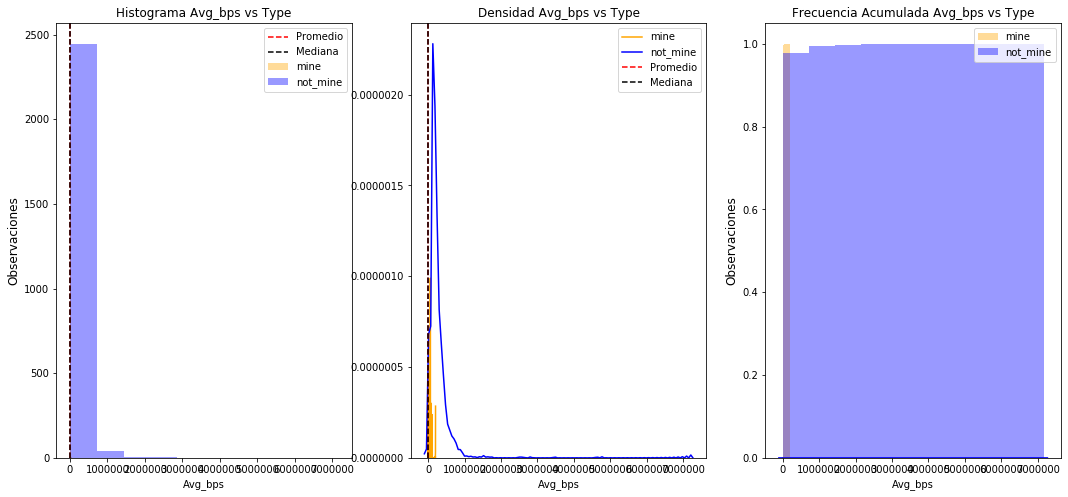

In [536]:
hist_plot(data_numeric_int[2],'Type','mine','not_mine')

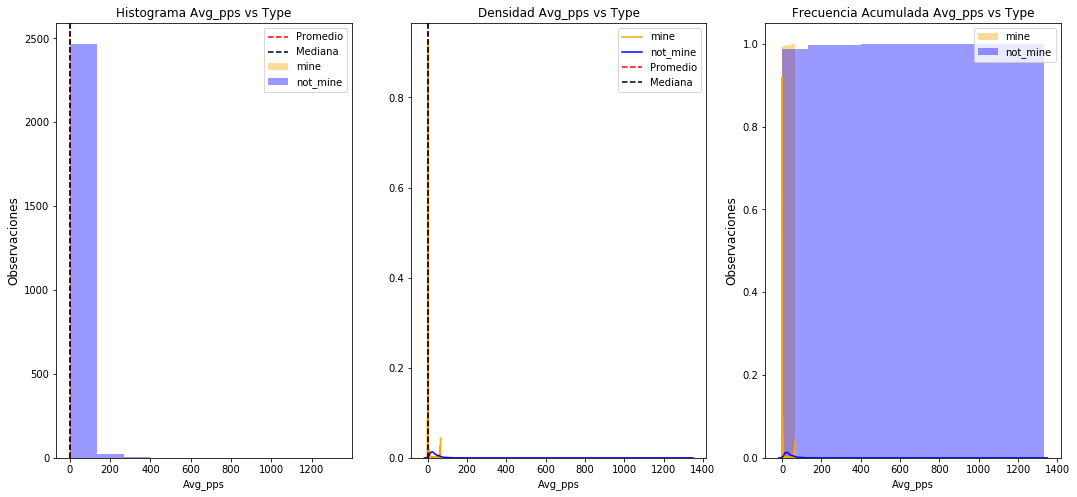

In [537]:
hist_plot(data_numeric_int[3],'Type','mine','not_mine')

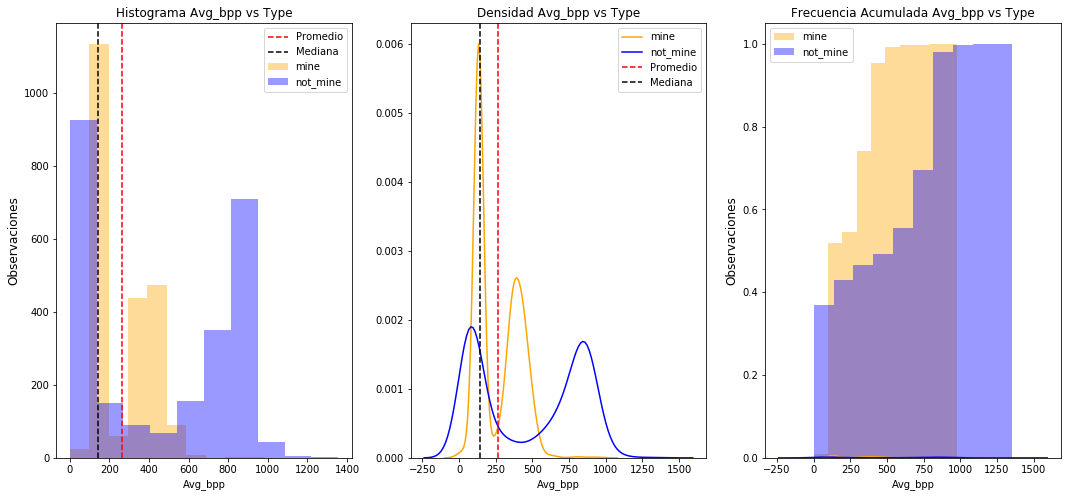

In [538]:
hist_plot(data_numeric_int[4],'Type','mine','not_mine')

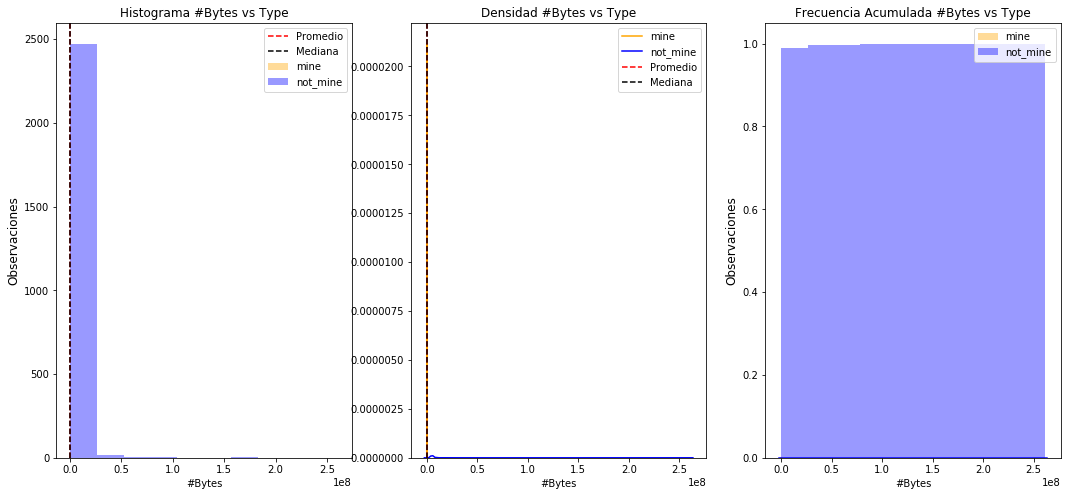

In [539]:
hist_plot(data_numeric_int[5],'Type','mine','not_mine')

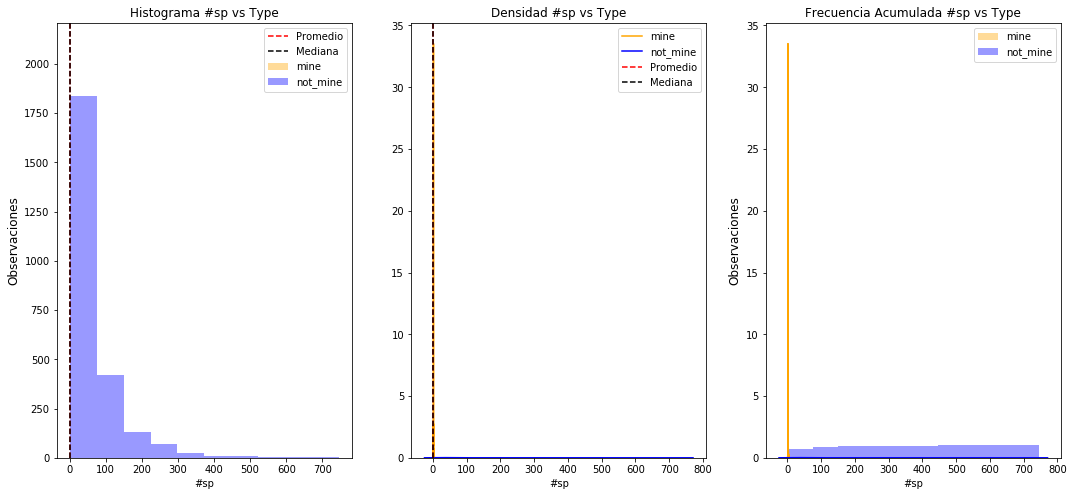

In [540]:
hist_plot(data_numeric_int[6],'Type','mine','not_mine')

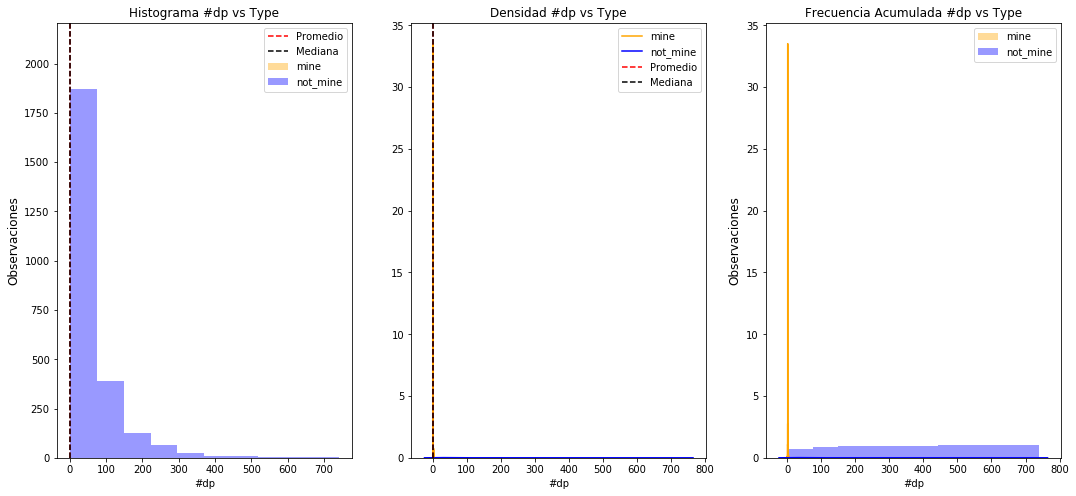

In [541]:
hist_plot(data_numeric_int[7],'Type','mine','not_mine')

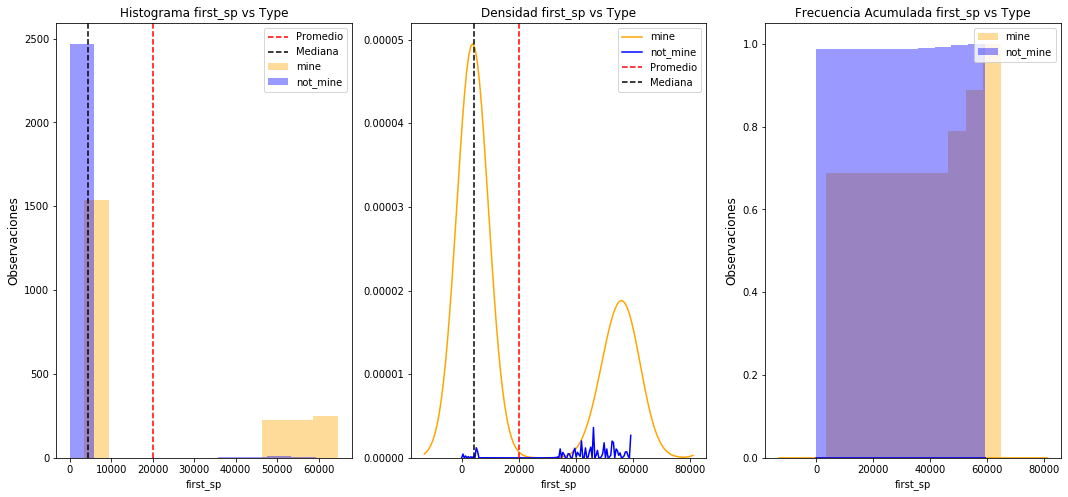

In [542]:
hist_plot(data_numeric_int[8],'Type','mine','not_mine')

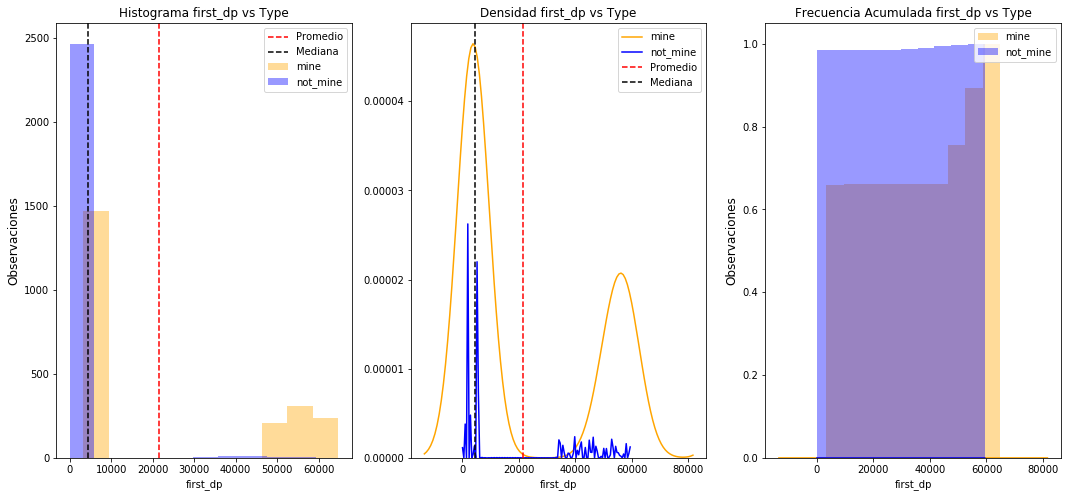

In [543]:
hist_plot(data_numeric_int[9],'Type','mine','not_mine')

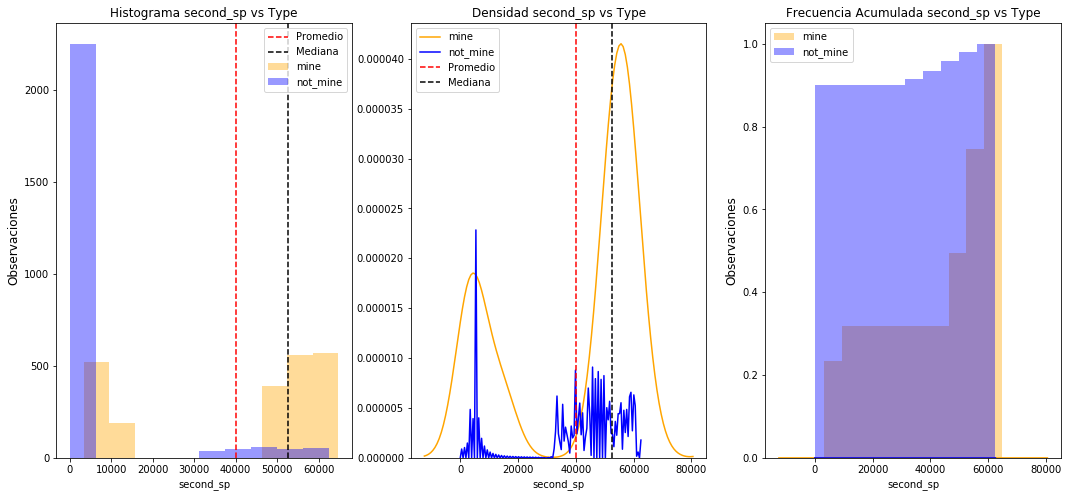

In [544]:
hist_plot(data_numeric_int[10],'Type','mine','not_mine')

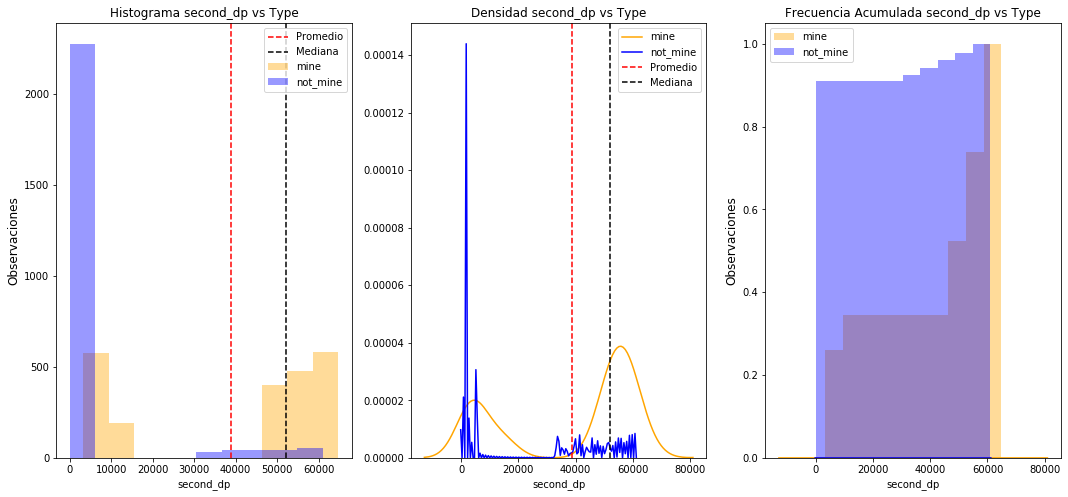

In [545]:
hist_plot(data_numeric_int[11],'Type','mine','not_mine')

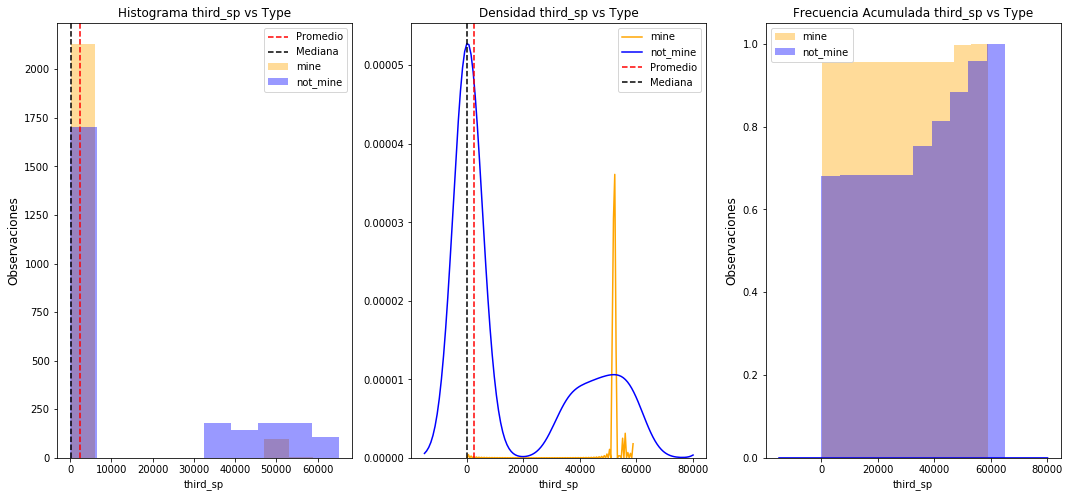

In [546]:
hist_plot(data_numeric_int[12],'Type','mine','not_mine')

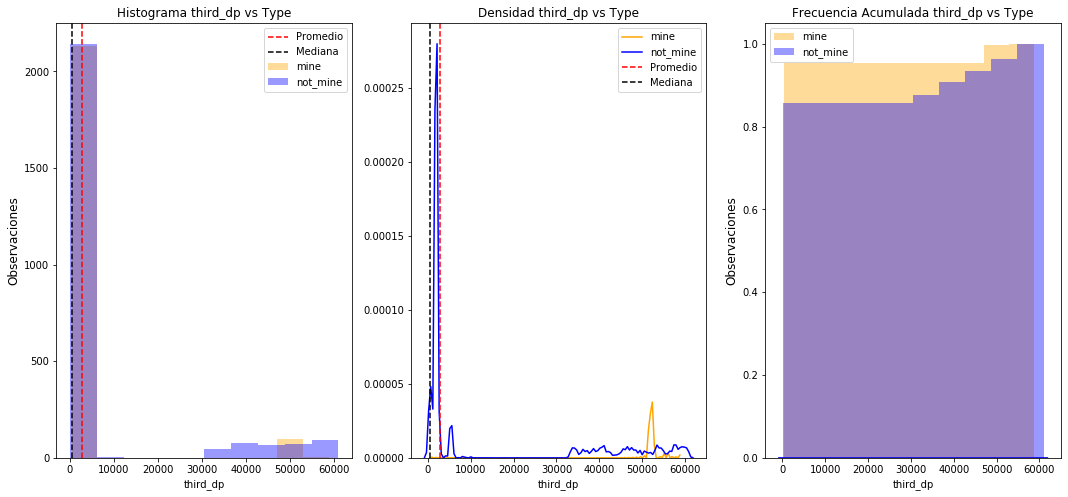

In [547]:
hist_plot(data_numeric_int[13],'Type','mine','not_mine')